In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt 


from sklearn.metrics import r2_score


from sklearn.metrics import f1_score



In [ ]:
# read data
df = pd.read_csv('Student_performance_data _.csv')

In [5]:
print(df.head(5))

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3

# Find the relationship between some features
# Visualize correlation

In [60]:
correlation_matrix = df.corr()
gpa_correlation = correlation_matrix['GPA']

print(gpa_correlation)

StudentID           -0.002697
Age                  0.000275
Gender              -0.013360
Ethnicity            0.027760
ParentalEducation   -0.035854
StudyTimeWeekly      0.179275
Absences            -0.919314
Tutoring             0.145119
ParentalSupport      0.190774
Extracurricular      0.094078
Sports               0.057859
Music                0.073318
Volunteering         0.003258
GPA                  1.000000
GradeClass          -0.782835
Name: GPA, dtype: float64


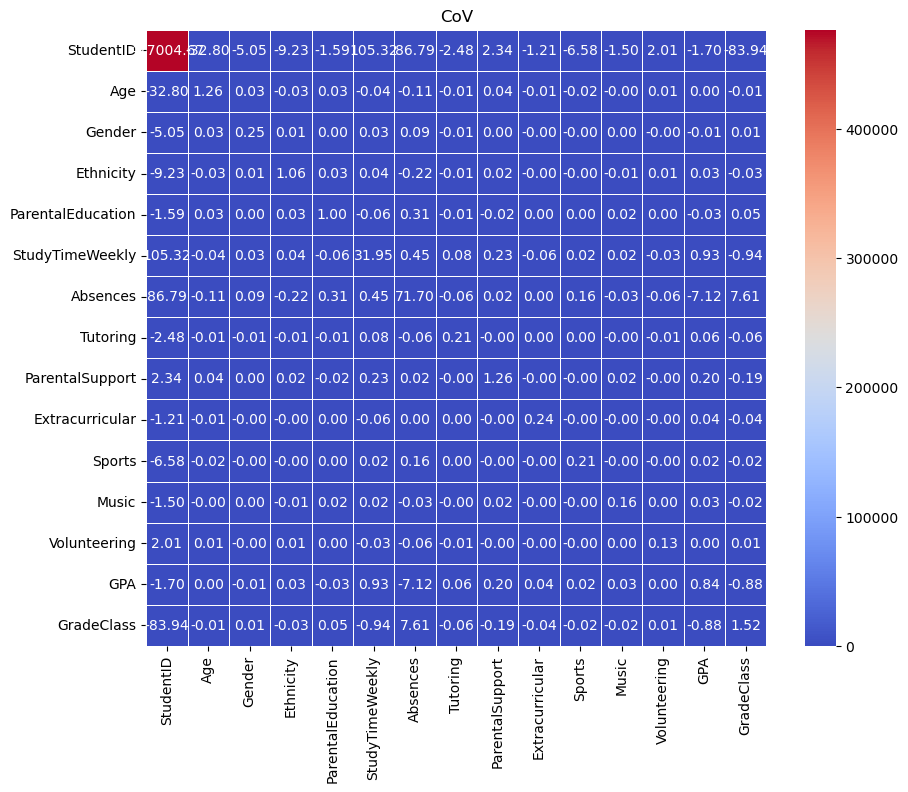

In [63]:
cov_matrix = df.cov()

plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('CoV')
plt.show()

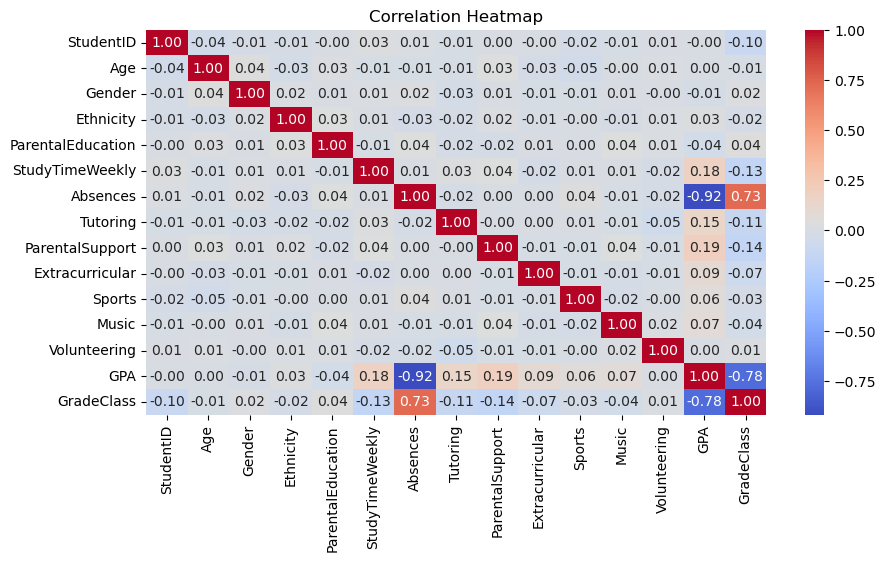

In [64]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# as we can see that the [Absences ParentalEducation, ParentalSupport, Gender, StudyTimeWeekly] nearly correlate with GPA =
# Absences is the most effect on the performance of their Students = -0.92 
# => Indicate that if the more absences increase, the gpa is small.
# => In this chart, we could see GradeClass also effect the GPA but GradeClass is deduced by GPA,
# So, we don't need this feature for training model

# RandomForest

In [12]:
df_GradeClassOrigin = df['GradeClass']
x = df.drop(['StudentID',  'Age', 'Gender', 'Sports', 'Music', 'GPA', 'GradeClass', 'Volunteering', 'Ethnicity'], axis=1)
y = df['GPA']  
# print(x.info)
# print(y.info)
x = pd.get_dummies(x)
# print(x)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=123) # 30% test 
print(X_train)
# print(X_test) 

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

y_predict = model.predict(X_test)


# Measure accurate 
mae = mean_absolute_error(Y_test, y_predict)
mse = mean_squared_error(Y_test, y_predict)
r2 = r2_score(Y_test, y_predict)
print(f'Mean Absolute Error: {mae:.4f}')
print(f'Mean Squared Error: {mse:.10f}')
print(f'R^2 Score: {r2}')

# Cross-validation với RandomForest
# model = RandomForestClassifier()
# scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='f1')

# print(f'Cross-validation F1 scores: {scores}')

      ParentalEducation  StudyTimeWeekly  Absences  Tutoring  ParentalSupport  \
990                   0         1.045373        19         1                2   
2047                  0         5.327553        26         1                1   
1670                  3        18.662264        24         1                2   
1692                  2        12.981612         4         1                2   
1978                  1         3.382078         4         0                1   
...                 ...              ...       ...       ...              ...   
1147                  1         8.824593        17         0                3   
2154                  2        13.913553         6         0                3   
1766                  1        17.271540        22         0                1   
1122                  2         0.566749        11         0                3   
1346                  1         3.135259        21         1                3   

      Extracurricular  
990

# Predict GPA with sample students infor

In [71]:
# Review: => The more MSE small, the model has more accurate

# Test model with sameple testcase:
data_input = {
    'StudentID': [1001, 1002, 1003, 1004, 1005],
    'Age': [17, 18, 15, 17, 17],
    'Gender': [1, 0, 0, 1, 1],
    'Ethnicity': [0, 0, 2, 0, 0],
    'ParentalEducation': [2, 1, 3, 3, 2],
    'StudyTimeWeekly': [19.833723, 15.408756, 4.210570, 10.028829, 4.672495],
    'Absences': [7, 0, 26, 14, 17],
    'Tutoring': [1, 0, 0, 0, 1],
    'ParentalSupport': [2, 1, 2, 3, 3],
    'Extracurricular': [0, 0, 0, 1, 0],
    'Sports': [0, 0, 0, 0, 0],
    'Music': [1, 0, 0, 0, 0],
    'Volunteering': [0, 0, 0, 0, 0],
}
data_input = pd.DataFrame(data_input)
data_test = data_input.iloc[:, 4:10]

# print(data_test)
def prediction(df_test) -> None:

    predictions = model.predict(df_test)
    
    return predictions
    




In [72]:
data_input['Predict_GPA'] = prediction(data_test)
df_predict1 = data_input

# Classification Student to GradeClass  

In [63]:

# after using regressor we just call function to categorize gradeclass
def categorize_gpa(gpa):
    if gpa >= 3.5:
        return 0  # 'A'
    elif gpa >= 3.0:
        return 1  # 'B'
    elif gpa >= 2.5:
        return 2  # 'C'
    elif gpa >= 2.0:
        return 3  # 'D'
    else:
        return 4  # 'F'

true_grade_classes = [2, 1, 4, 3, 4]  

data_input['True'] = true_grade_classes


def review(data_input, df_predicted) -> None:
    accuracy = accuracy_score(df_predicted, data_input)
    print(f'Accuracy: {accuracy:.4f}')
    print(classification_report(df_predicted, data_input))




Accuracy: 1.0000
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [67]:
df_predict1['Predict_GradeClass'] = df_predict1['Predict_GPA'].apply(categorize_gpa)

review(data_input['True'], df_predict1['Predict_GradeClass'])

Accuracy: 1.0000
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



# Test with more big sample

In [80]:
# Test with 70% data of student_performance_data
df_test = pd.read_csv('Student_performance_data _.csv')
x_ignore, x_test = train_test_split(df_test, test_size=0.7, random_state=42)

y_true = pd.DataFrame()
y_true['Grade_Class'] = x_test['GradeClass']
x_test = x_test.iloc[:, 4:10]
# print(y_true)
print(x_test)

      ParentalEducation  StudyTimeWeekly  Absences  Tutoring  ParentalSupport  \
1004                  4         0.135763        17         0                2   
196                   4         1.989925         0         0                1   
2342                  0        10.588715        15         0                3   
1708                  2        16.208658         1         0                3   
435                   0         3.576821        27         0                1   
...                 ...              ...       ...       ...              ...   
1262                  1        12.814204        27         0                1   
223                   3         4.998034         3         0                3   
145                   3        10.641736         9         0                3   
1088                  2        16.337560        19         0                0   
373                   2        14.078733        11         0                3   

      Extracurricular  
100

In [74]:

# print(x_test)
df_predicted_big_sample = pd.DataFrame()
df_predicted_big_sample['Predict_GPA'] = prediction(x_test)
print(df_predicted_big_sample)

df_predicted_big_sample['Predicted_GradeClass'] = df_predicted_big_sample['Predict_GPA'].apply(categorize_gpa)
print(df_predicted_big_sample)



      Predict_GPA
0        1.446178
1        2.989545
2        2.096028
3        3.503427
4        0.286768
...           ...
1670     0.678742
1671     2.752352
1672     2.619026
1673     0.868617
1674     2.329157

[1675 rows x 1 columns]
      Predict_GPA  Predicted_GradeClass
0        1.446178                     4
1        2.989545                     2
2        2.096028                     3
3        3.503427                     0
4        0.286768                     4
...           ...                   ...
1670     0.678742                     4
1671     2.752352                     2
1672     2.619026                     2
1673     0.868617                     4
1674     2.329157                     3

[1675 rows x 2 columns]


In [85]:
# print(y_true)
# print(df_predicted_big_sample)
review(y_true['Grade_Class'], df_predicted_big_sample['Predicted_GradeClass'])


Accuracy: 0.8215
              precision    recall  f1-score   support

           0       0.38      0.90      0.53        30
           1       0.67      0.69      0.68       178
           2       0.74      0.73      0.73       274
           3       0.75      0.70      0.72       306
           4       0.94      0.92      0.93       887

    accuracy                           0.82      1675
   macro avg       0.70      0.79      0.72      1675
weighted avg       0.83      0.82      0.83      1675

